In [ ]:
import os
from os import listdir
from PIL import Image as Img
from numpy import asarray
from numpy import expand_dims
from matplotlib import pyplot
from keras.models import load_model
import numpy as np
import tensorflow as tf

import pickle
import cv2

In [ ]:
HaarCascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
facedetect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
cap=cv2.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
font=cv2.FONT_HERSHEY_COMPLEX

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1"

--2023-01-04 16:57:18--  https://drive.google.com/uc?export=download&id=1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1
Resolving drive.google.com (drive.google.com)... 142.250.159.139, 142.250.159.100, 142.250.159.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.159.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gh6op6c6i1t4bdlea81e9fk26sp8pstd/1672851375000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download&uuid=adf86db0-730c-458b-85ef-f5f15f82bf54 [following]
--2023-01-04 16:57:22--  https://doc-04-4s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gh6op6c6i1t4bdlea81e9fk26sp8pstd/1672851375000/09379222848295305915/*/1PZ_6Zsy1Vb0s0JmjEmVd8FS99zoMCiN1?e=download&uuid=adf86db0-730c-458b-85ef-f5f15f82bf54
Resolving doc-04-4s-docs.googleusercontent.com (doc-04-4s-docs.googleusercontent.com)... 74.125.126.132, 2

In [ ]:
MyFaceNet = FaceNet()

In [ ]:
from keras_facenet import FaceNet

In [ ]:
folder='fotoPeserta/'
database = {}

for filename in listdir(folder):

    path = folder + filename
    gbr1 = cv2.imread(folder + filename)
    
    wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
    
    if len(wajah)>0:
        x1, y1, width, height = wajah[0]         
    else:
        x1, y1, width, height = 1, 1, 10, 10
        
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
    gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
    gbr_array = asarray(gbr)
    
    face = gbr_array[y1:y2, x1:x2]                        
    
    face = Img.fromarray(face)                       
    face = face.resize((160,160))
    face = asarray(face)
    
    face = expand_dims(face, axis=0)
    signature = MyFaceNet.embeddings(face)
    
    database[os.path.splitext(filename)[0]]=signature

1/1 [==============================] - 0s 110ms/step


In [ ]:
database

{'lidia ginting': array([[ 1.18979504e-02, -1.79303735e-02, -1.73233002e-02,
          2.24626772e-02, -8.15786701e-03, -3.42205763e-02,
          4.76192795e-02,  4.65703243e-03, -1.77868139e-02,
         -9.08764545e-03,  6.51696399e-02,  2.45436952e-02,
          1.97747517e-02,  7.38596264e-03,  1.38453497e-02,
          8.41129012e-03,  1.10195138e-01,  5.90713285e-02,
          4.14193561e-03,  4.22017761e-02,  3.52968648e-02,
          3.10462173e-02,  5.51487356e-02, -4.49166223e-02,
         -4.42272834e-02, -2.31424589e-02,  3.64290476e-02,
         -2.61070225e-02,  7.19705224e-02,  4.43043411e-02,
         -1.34783061e-02, -4.77032177e-03, -5.30998670e-02,
          3.63745354e-02, -1.24796224e-03, -4.92799170e-02,
         -8.07545632e-02, -2.86993515e-02, -1.52875399e-02,
          7.56181180e-02,  1.43305222e-02, -5.08933403e-02,
         -3.18763293e-02,  6.92324415e-02, -3.26410681e-02,
         -9.72199545e-04,  5.68388738e-02,  6.95324764e-02,
         -7.22180903e-0

In [ ]:
myfile = open("data.pkl", "wb")
pickle.dump(database, myfile)
myfile.close()

In [ ]:
myfile = open("data.pkl", "rb")
database = pickle.load(myfile)
myfile.close()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  img = cv2.imdecode(jpg_as_np, flags=1)
  return img

In [ ]:
def findFaces(data):
  gbr1 = js_to_image(data)
  gbr = cv2.cvtColor(gbr1, cv2.COLOR_BGR2RGB)
  gbr = Img.fromarray(gbr)                  # konversi dari OpenCV ke PIL
  gbr_array = asarray(gbr)
 
  wajah = HaarCascade.detectMultiScale(gbr1,1.1,4)
  
  for (x1,y1,w,h) in wajah:
      x1, y1 = abs(x1), abs(y1)
      x2, y2 = x1 + w, y1 + h
    
      face = gbr_array[y1:y2, x1:x2]                        
    
      face = Img.fromarray(face)                       
      face = face.resize((160,160))
      face = asarray(face)
    
      face = expand_dims(face, axis=0)
      signature = MyFaceNet.embeddings(face)
    
      min_dist=100
      identity=' '
      for key, value in database.items() :
        dist = np.linalg.norm(value-signature)
        if dist < min_dist:
          min_dist = dist
          identity = key
            
      cv2.putText(gbr1,identity, (x1,y1),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1, cv2.LINE_AA)
      cv2.rectangle(gbr1,(x1,y1),(x2,y2), (0,255,0), 2)
  
  filename='photo.jpg'
  cv2.imwrite(filename, gbr1)
  
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
 
  filename=findFaces(data)

  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 111ms/step
Saved to photo.jpg


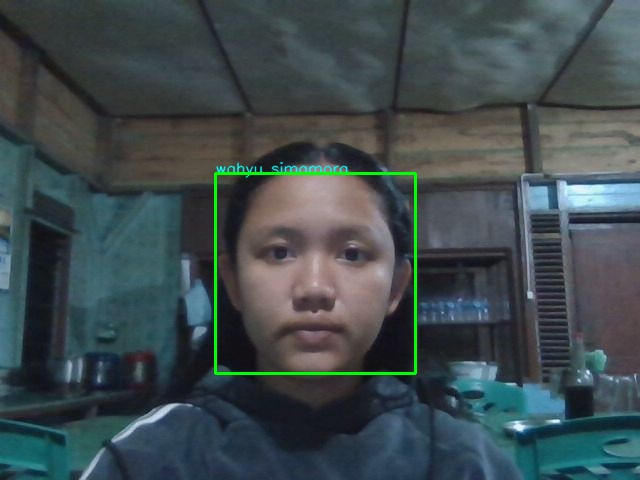

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))